In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
(pics, labels), _ = mnist.load_data()

In [5]:
pics.shape

(60000, 28, 28)

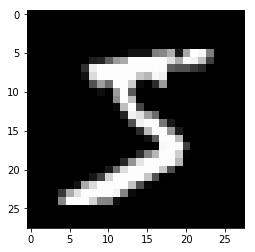

In [9]:
plt.imshow(pics[0], cmap=plt.cm.gray)

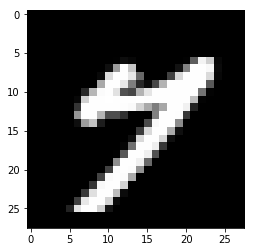

In [10]:
plt.imshow(pics[1001], cmap=plt.cm.gray)

In [11]:
labels[1001]

7

In [12]:
pics.shape

(60000, 28, 28)

In [13]:
pics = np.resize(pics, (60000, 784)) # 28 * 28 would be a better thing to have written

In [14]:
pics.shape

(60000, 784)

In [15]:
pics

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
pics[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [17]:
pics = pics.astype('float32')

In [18]:
pics /= 255

In [19]:
pics[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
labels[0]

5

In [21]:
labels = np_utils.to_categorical(labels, 10)

In [22]:
labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [23]:
model = Sequential()

In [24]:
model.add(Dense(512, input_dim = 28 * 28, activation='relu'))

In [25]:
model.add(Dropout(0.2))

In [26]:
model.add(Dense(512, activation='relu'))

In [27]:
model.add(Dropout(0.2))

In [28]:
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
training_pics = pics[:54000]

In [31]:
testing_pics = pics[54000:]

In [32]:
training_labels = labels[:54000]

In [36]:
testing_labels = labels[54000:]

In [37]:
def TrainingLoop(number_of_epochs, verbose):
    model.fit(training_pics, 
              training_labels, 
              batch_size=128, 
              epochs=number_of_epochs, 
              verbose=verbose, 
              validation_split=.1, 
              validation_data=(testing_pics, testing_labels) )

In [38]:
TrainingLoop(10, 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 42s - loss: 0.2645 - acc: 0.9197 - val_loss: 0.1162 - val_acc: 0.9652
Epoch 2/10
54000/54000 [==============================] - 41s - loss: 0.1079 - acc: 0.9675 - val_loss: 0.0745 - val_acc: 0.9768
Epoch 3/10
54000/54000 [==============================] - 37s - loss: 0.0759 - acc: 0.9759 - val_loss: 0.0794 - val_acc: 0.9763
Epoch 4/10
54000/54000 [==============================] - 39s - loss: 0.0576 - acc: 0.9813 - val_loss: 0.0759 - val_acc: 0.9785
Epoch 5/10
54000/54000 [==============================] - 43s - loss: 0.0487 - acc: 0.9844 - val_loss: 0.0762 - val_acc: 0.9792
Epoch 6/10
54000/54000 [==============================] - 45s - loss: 0.0406 - acc: 0.9868 - val_loss: 0.0659 - val_acc: 0.9808
Epoch 7/10
54000/54000 [==============================] - 50s - loss: 0.0361 - acc: 0.9884 - val_loss: 0.0741 - val_acc: 0.9798
Epoch 8/10
54000/54000 [==============================]

In [39]:
pics[1001]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
result = model.predict(np.array(pics[1001]), batch_size=1, verbose=1)

ValueError: Error when checking : expected dense_1_input to have shape (None, 784) but got array with shape (784, 1)

In [58]:
test_data = np.array([pics[1001]]) # To make a batch of one, could do np.expand_dims(pics[1001], axis=0)

In [59]:
test_data.shape

(1, 784)

In [45]:
test_data

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [46]:
result = model.predict(test_data, batch_size=1, verbose=1)

1/1 [==============================] - 0s


In [47]:
result

array([[5.6414833e-09, 7.7889308e-07, 4.4619743e-08, 4.3258611e-10,
        3.4725163e-05, 1.2630468e-07, 1.7701429e-10, 9.9995375e-01,
        8.7070845e-10, 1.0446750e-05]], dtype=float32)

In [52]:
vote = result[0].tolist().index(max(result[0]))

In [54]:
vote

7

In [55]:
test_data.shape

(1, 784)

In [56]:
np.argmax(result, axis=1)[0]

7

In [57]:
model.save_weights('keras_digits.hd5')